# Goat Detector Training
This notebook utilizes the fastai and fastbook libraries to train a machine learning model for image classification. The goal is to classify images as either featuring Messi or Cristiano Ronaldo, two renowned football players.
## Importing Necessary Libraries
Import fastai and fastbook libraries essential for image loading, preparation, and machine learning model operations.


In [1]:
!pip install -Uqq fastai fastbook Pillow nbdev
import fastbook
fastbook.setup_book()
from fastbook import *


## Loading and Preparing Images
Load the dataset containing images of Messi and Cristiano Ronaldo. This step includes preprocessing the images to make them suitable for training the model.


In [49]:
from fastcore.all import *
from fastai.vision.all import *
from PIL import Image

def search_images(term, max_images=30):
    "term : (string )name of the search target"
    print(f"Searching for '{term}'")
    return search_images_ddg(term, max_images)



In [3]:
urls = search_images('Cristiano Ronaldo photos', max_images=1)
urls[0]

Searching for 'Cristiano Ronaldo photos'


'http://www.fotolip.com/wp-content/uploads/2016/05/Cristiano-Ronaldo-1.jpg'

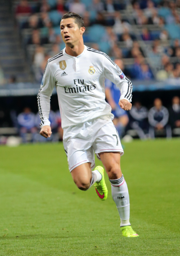

In [4]:
from fastdownload import download_url
dest = 'cristiano.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

In [13]:
messi_dest = 'messi.jpg'
messi_image_url = search_images('Lionel Messi photos', max_images=1)
messi_image_url

Searching for 'Lionel Messi photos'


(#1) ['https://wallpapercave.com/wp/wp2043344.jpg']

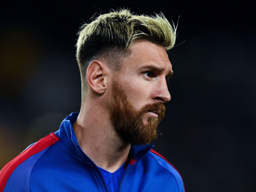

In [24]:
download_url(messi_image_url[0], messi_dest, show_progress=False)
im_messi = Image.open(messi_dest)
im_messi.to_thumb(256,256)

In [36]:
searches = 'Cristiano Ronaldo','Lionel Messi'

path = Path('images')
from time import sleep

for o in searches:
    dest = (path/o)
    print(dest)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

images/Cristiano Ronaldo
Searching for 'Cristiano Ronaldo photo'


/Users/jasonsuarez/anaconda3/envs/pydata-book/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


images/Lionel Messi
Searching for 'Lionel Messi photo'


In [50]:
# Check if any image is broken and delete it
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

## Preparing for Model Training
Setup of the pretrained model for fine-tuning. This includes specifying model parameters and configuring the learning environment.


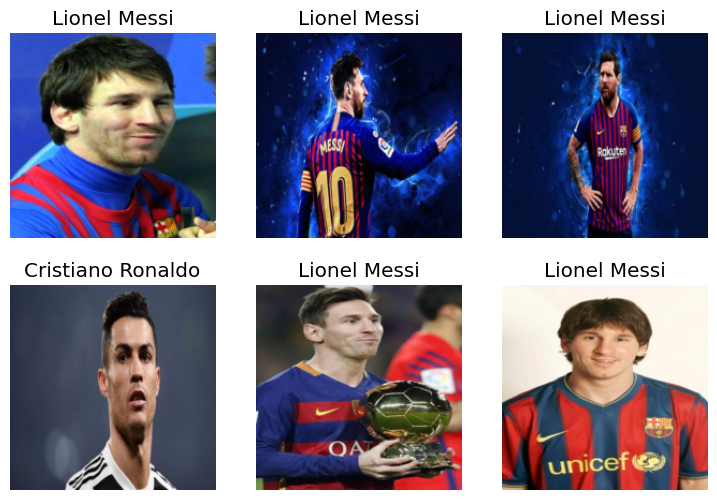

In [38]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

## Training the Model
Fine-tuning the pretrained model on our dataset. This step involves training the model to classify images as either Messi or Cristiano Ronaldo accurately.


In [39]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.065711,0.397649,0.196078,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.476915,0.178397,0.058824,00:02
1,0.365285,0.163348,0.058824,00:02
2,0.277333,0.129455,0.058824,00:02


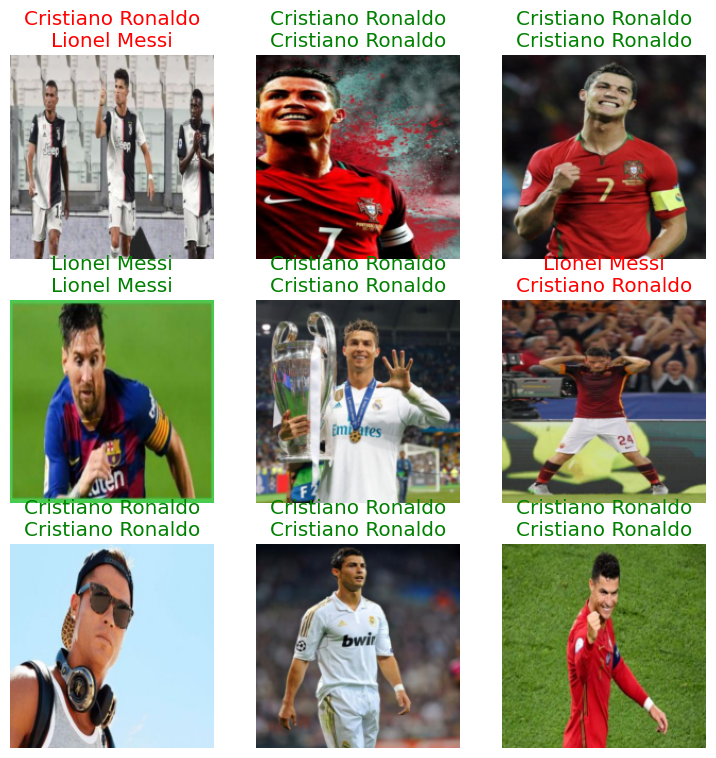

In [40]:
results = learn.show_results()

## Evaluating the Model
Assess the performance of the trained model on test data to ensure accurate classification.


In [41]:
is_goat,_,probs = learn.predict(PILImage.create('cristiano.jpg'))
print(f"Who is it?: {is_goat}.")
print(f"Probability it's the GOAT: {probs[0]:.4f}")

Is it the GOAT?: Cristiano Ronaldo.
Probability it's the GOAT: 0.9999


In [47]:
is_goat,_,probs = learn.predict(PILImage.create('messi.jpg'))
print(f"Who is it?: {is_goat}.")
print(f"Probability it's the GOAT: {probs[0]:.4f} 🙃")  # Picking the probability it's Ronaldo when it's Messi tells the joke

Who is it?: Lionel Messi.
Probability it's the GOAT: 0.0002 🙃


In [ ]:
# Exports the model as a pickel file that may later be loaded, regardless of all the code that have served to train it.
# Have a look on the goat_detector_inference.ipynb file to see how it's done 
learn.export()

## Conclusion
Summary of the training process and results. The trained model is now capable of classifying images between Messi and Cristiano Ronaldo with a certain accuracy.
